##  <u> *Exploratory Data Analysis - EDA*  </u>

In [2]:
%run C:\Users\Omar\Desktop\Omar_Files\Python_Analysis\Auto_Insurance\Notebooks\Data_Analysis\1_DataImporting.ipynb

(67856, 10)
The data set has 67856 rows, and 10 features
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67856 entries, 0 to 67855
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   veh_value  67856 non-null  float64
 1   exposure   67856 non-null  float64
 2   clm        67856 non-null  int64  
 3   numclaims  67856 non-null  int64  
 4   claimcst0  67856 non-null  float64
 5   veh_body   67856 non-null  object 
 6   veh_age    67856 non-null  int64  
 7   gender     67856 non-null  object 
 8   area       67856 non-null  object 
 9   agecat     67856 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 5.2+ MB
The total number of na_values are : 0

The number of na-values in each features are :


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from datetime import datetime,time
import os

In [4]:
df.head()

,veh_value,exposure,clm,numclaims,claimcst0,veh_body,veh_age,gender,area,agecat
0,1.06,0.303901,0,0,0.0,HBACK,3,F,C,2
1,1.03,0.648871,0,0,0.0,HBACK,2,F,A,4
2,3.26,0.569473,0,0,0.0,UTE,2,F,E,2
3,4.14,0.317591,0,0,0.0,STNWG,2,F,D,2
4,0.72,0.648871,0,0,0.0,HBACK,4,F,C,2


---

## *Descrirptive statistics*

### *A.* <u>*categorical & numerical_features:*</u>

In [5]:
df["numclaims"]=df["numclaims"].astype("object")
df["clm"]=df["clm"].astype("object")
df["agecat"]=df["agecat"].astype("object")
df["veh_age"]=df["veh_age"].astype("object")

In [6]:
categorical_features=df.select_dtypes(include=["object"])
numerical_features=df.select_dtypes(exclude=["object"])

In [7]:
print("we have {} numerical features : {}\n".format(numerical_features.shape[1],list(numerical_features.columns)))
print("we have {} categorical features : {}".format(categorical_features.shape[1],list(categorical_features.columns)))

we have 3 numerical features : ['veh_value', 'exposure', 'claimcst0']

we have 7 categorical features : ['clm', 'numclaims', 'veh_body', 'veh_age', 'gender', 'area', 'agecat']


---

### *B.* <u>*Basic data statistics:*</u>

* #### *Numerical data statistics :*

In [8]:
df.describe()

,veh_value,exposure,claimcst0
count,67856.000000,67856.000000,67856.000000
mean,1.777021,0.468652,137.270167
std,1.205232,0.290025,1056.297768
min,0.000000,0.002738,0.000000
25%,1.010000,0.219028,0.000000
50%,1.500000,0.446270,0.000000
75%,2.150000,0.709103,0.000000
max,34.560000,0.999316,55922.129883


* #### *Categorical data statistics :*

In [9]:
df.describe(include="object")

,clm,numclaims,veh_body,veh_age,gender,area,agecat
count,67856,67856,67856,67856,67856,67856,67856
unique,2,5,13,4,2,6,6
top,0,0,SEDAN,3,F,C,4
freq,63232,63232,22233,20064,38603,20540,16189


---

### *C.* <u>*EDA - Data Visualization:*</u>

* ####  <u> *Numerical features Visualization :*  </u>

In [10]:
# creating one function for plotting numerical_features
def plot_numerical_features(numerical_features,ChartType):
    nrows = 1
    ncols = 3

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,5))
    
    axes = axes.flatten()

    for i, column in enumerate(numerical_features.columns):
        if i >= nrows * ncols:
            break 
        numerical_features[column].plot(ax=axes[i], kind=f"{ChartType}")

    plt.tight_layout()
    plt.show()

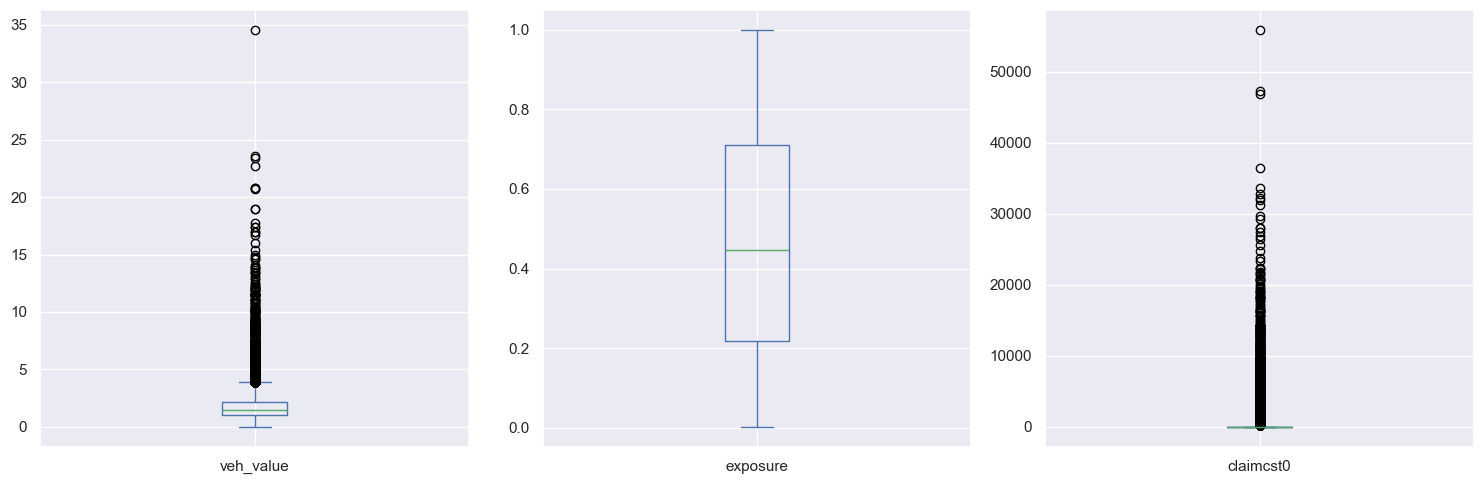

In [11]:
plot_numerical_features(numerical_features,"box")

* ####  <u> *Categorical features Visualization :*  </u>

In [12]:
# creating one function for plotting categorical_features
def plot_categorical_features(categorical_features):
    nrows = 3
    ncols = 3
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

    axes = axes.flatten()
    
    for i, column in enumerate(categorical_features.columns):
        if i >= nrows * ncols:
            break 
        ax = axes[i]
        counts = categorical_features[column].value_counts()
        counts.plot(kind='bar', ax=ax, title=column)
        
        for bar in ax.patches:
            ax.annotate(
                str(bar.get_height()),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points'
            )
        
    plt.tight_layout()
    plt.show()

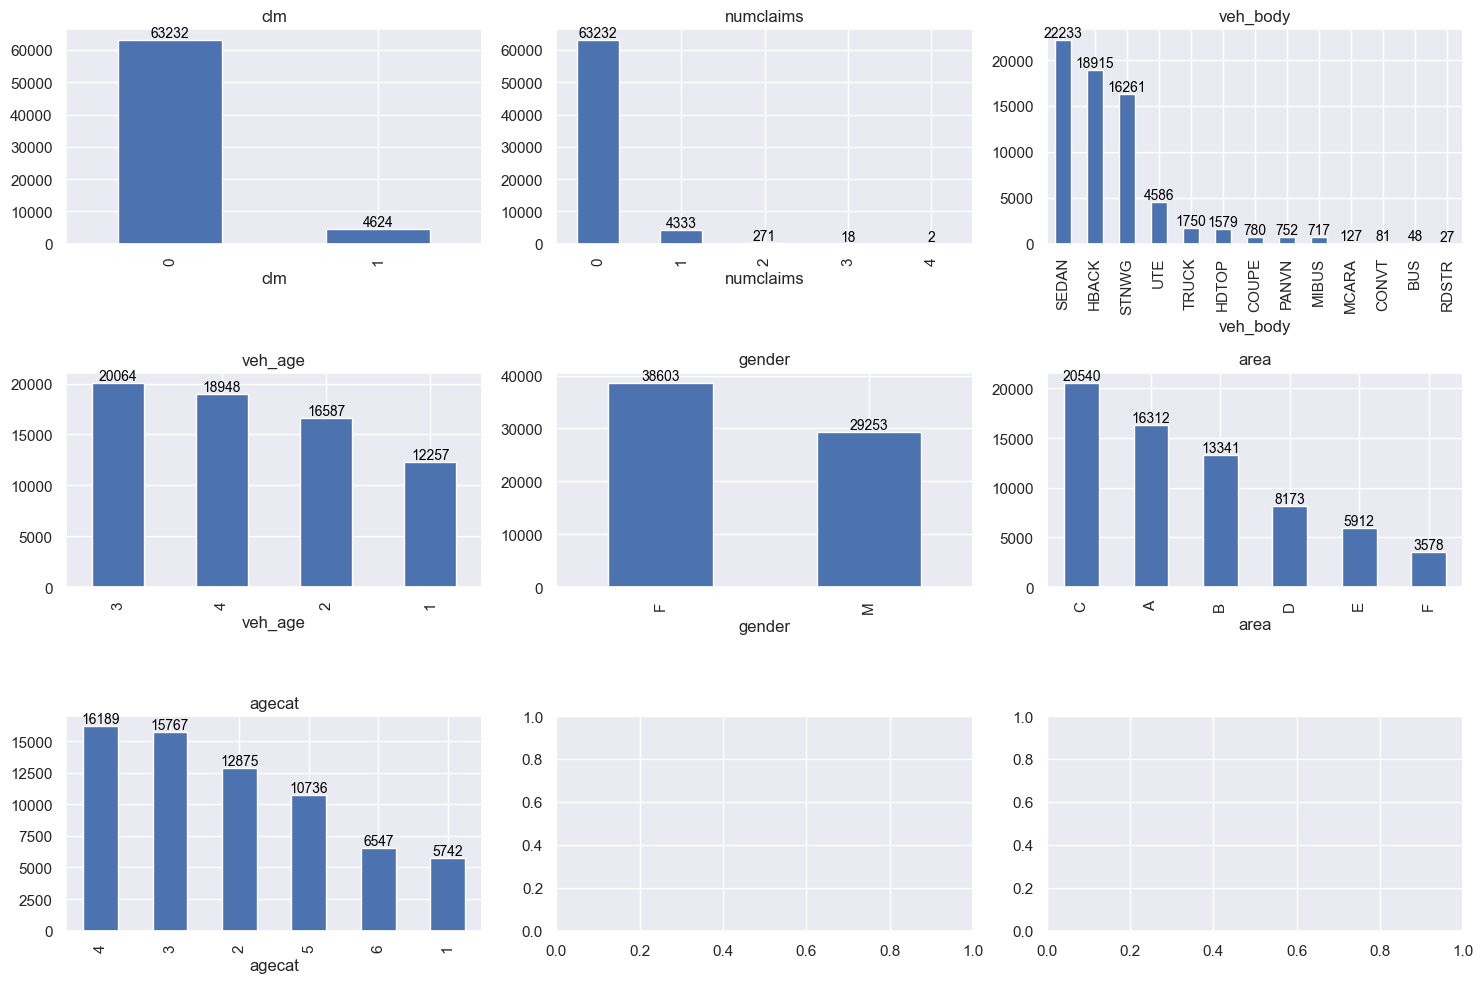

In [13]:
plot_categorical_features(categorical_features)

---

### *C.* <u>*EDA Correlation*</u>

<Axes: >

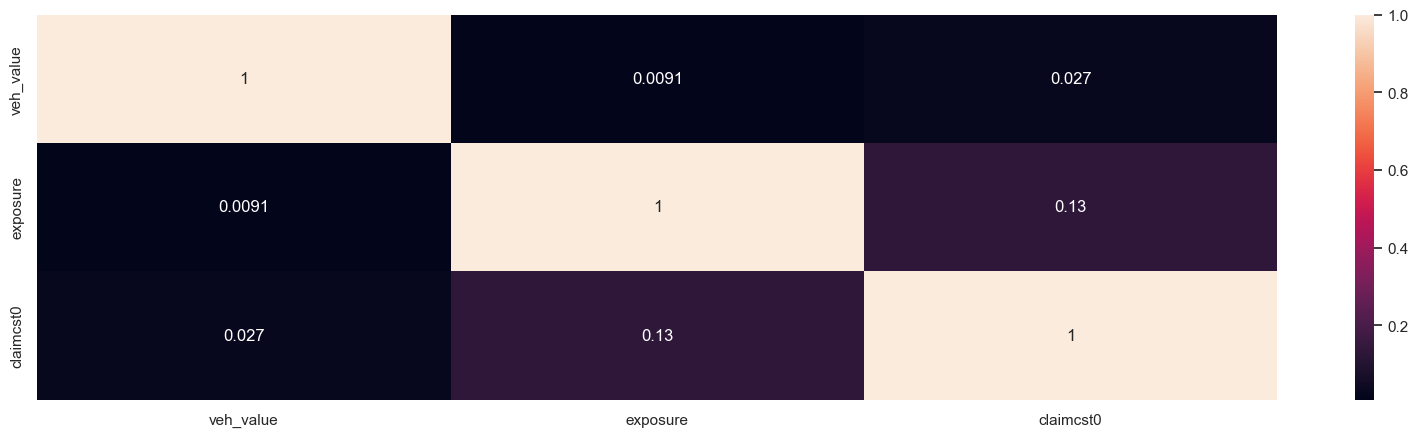

In [14]:
plt.subplots(figsize=(20,5))
sns.heatmap(numerical_features.corr(method="spearman"),annot=True)

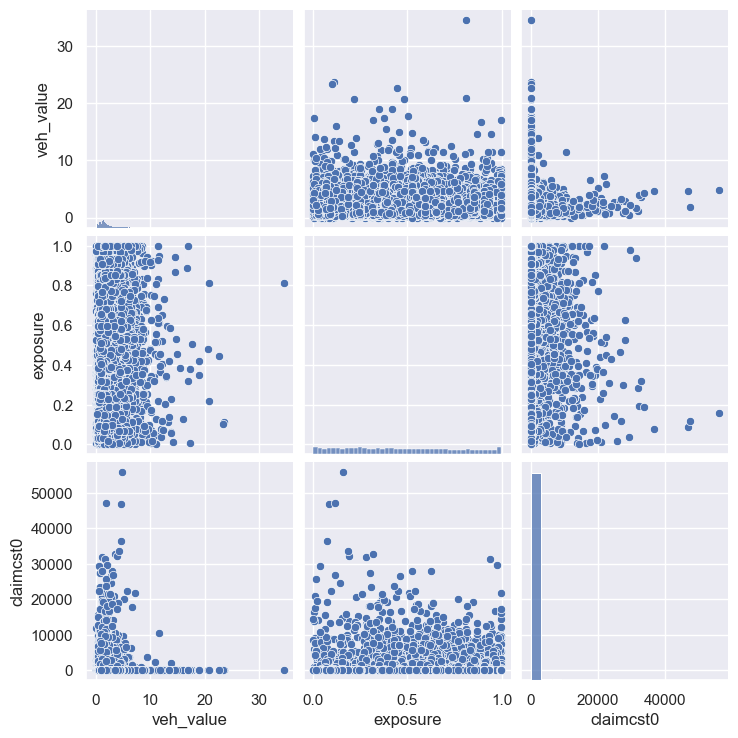

In [15]:
sns.pairplot(numerical_features);

---

## *D. Further EDA - with Positive Claims*

*Creating one function to get all needed data*

In [16]:
def summary(feature):
    TotalClaimsCount=pd.DataFrame(df.groupby(f"{feature}")["numclaims"].sum())
    Totalexposure=pd.DataFrame(round(df.groupby(f"{feature}")["exposure"].sum()))
    TotalClaims=pd.DataFrame(round(df.groupby(f"{feature}")["claimcst0"].sum()))
    Frequency=pd.DataFrame(TotalClaimsCount["numclaims"]/Totalexposure["exposure"],columns=["Frequency"])
    severity=pd.DataFrame(TotalClaims["claimcst0"]/TotalClaimsCount["numclaims"],columns=["severity"])
    Risk_Premium=pd.DataFrame(round(TotalClaims["claimcst0"]/Totalexposure["exposure"]),columns=["Risk_Premium"])
  
    
    return pd.concat([TotalClaimsCount, Totalexposure, TotalClaims,Frequency,severity,Risk_Premium],axis=1)

* *Gender_Summary*

In [17]:
gender_Summary=summary('gender')
gender_Summary

,numclaims,exposure,claimcst0,Frequency,severity,Risk_Premium
gender,,,,,,
F,2832,17955.0,4908749.0,0.157728,1733.315325,273.0
M,2105,13846.0,4405855.0,0.152029,2093.042755,318.0


* *Veh_body_Summary*

In [18]:
veh_body_Summary=summary('veh_body')
veh_body_Summary

,numclaims,exposure,claimcst0,Frequency,severity,Risk_Premium
veh_body,,,,,,
BUS,10,26.0,13363.0,0.384615,1336.3,514.0
CONVT,3,33.0,6889.0,0.090909,2296.333333,209.0
COUPE,75,319.0,187723.0,0.23511,2502.973333,588.0
HBACK,1330,8810.0,2589136.0,0.150965,1946.718797,294.0
HDTOP,136,783.0,294812.0,0.173691,2167.735294,377.0
MCARA,15,59.0,10674.0,0.254237,711.6,181.0
MIBUS,45,317.0,116105.0,0.141956,2580.111111,366.0
PANVN,68,409.0,133113.0,0.166259,1957.544118,325.0
RDSTR,3,12.0,1369.0,0.25,456.333333,114.0


* *Veh_age_Summary*

In [19]:
veh_age_Summary=summary('veh_age')
veh_age_Summary

,numclaims,exposure,claimcst0,Frequency,severity,Risk_Premium
veh_age,,,,,,
1,876,5339.0,1555255.0,0.164076,1775.405251,291.0
2,1354,7924.0,2486217.0,0.170873,1836.201625,314.0
3,1446,9542.0,2718237.0,0.151541,1879.83195,285.0
4,1261,8996.0,2554895.0,0.140173,2026.086439,284.0


* *Area_Summary*

In [20]:
area_Summary=summary('area')
area_Summary

,numclaims,exposure,claimcst0,Frequency,severity,Risk_Premium
area,,,,,,
A,1181,7597.0,2071766.0,0.155456,1754.247248,273.0
B,1021,6298.0,1795295.0,0.162115,1758.369246,285.0
C,1493,9578.0,2865707.0,0.155878,1919.428667,299.0
D,524,3820.0,911058.0,0.137173,1738.660305,238.0
E,413,2772.0,868823.0,0.14899,2103.687651,313.0
F,305,1736.0,801955.0,0.175691,2629.360656,462.0


* *Agecat_Summary*

In [21]:
agecat_Summary=summary('agecat')
agecat_Summary

,numclaims,exposure,claimcst0,Frequency,severity,Risk_Premium
agecat,,,,,,
1,525,2612.0,1307373.0,0.200995,2490.234286,501.0
2,1000,5892.0,1984841.0,0.169722,1984.841,337.0
3,1189,7409.0,2132107.0,0.16048,1793.19344,288.0
4,1185,7617.0,2145303.0,0.155573,1810.382278,282.0
5,648,5171.0,1061412.0,0.125314,1637.981481,205.0
6,390,3100.0,683569.0,0.125806,1752.741026,221.0


---

### *A.* <u>*Apply mutual_info_regression*</u>

In [23]:
df2=df[['veh_value', 'claimcst0', 'veh_body','veh_age', 'gender', 'area', 'agecat']]

* ####  <u>  <u>*Create mutual_info_regression Function :*</u>

In [24]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [25]:
X_1 = df2.copy()
y_1= X_1.pop("claimcst0")
# Label encoding for categoricals
for colname in X_1.select_dtypes("object"):
    X_1[colname], _ = X_1[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features_1 = X_1.dtypes == int

In [26]:
mi_scores_1 = make_mi_scores(X_1, y_1, discrete_features_1)
print(f"\n Faetures Importance for claimcst0 Feature:\n {mi_scores_1}")  # show a few features with their MI scores


 Faetures Importance for claimcst0 Feature:
 veh_body     0.007323
area         0.005627
veh_age      0.001872
veh_value    0.000129
gender       0.000000
agecat       0.000000
Name: MI Scores, dtype: float64


* ####  <u>  <u>*Visualize mutual_info_regression results :*</u>

In [27]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)

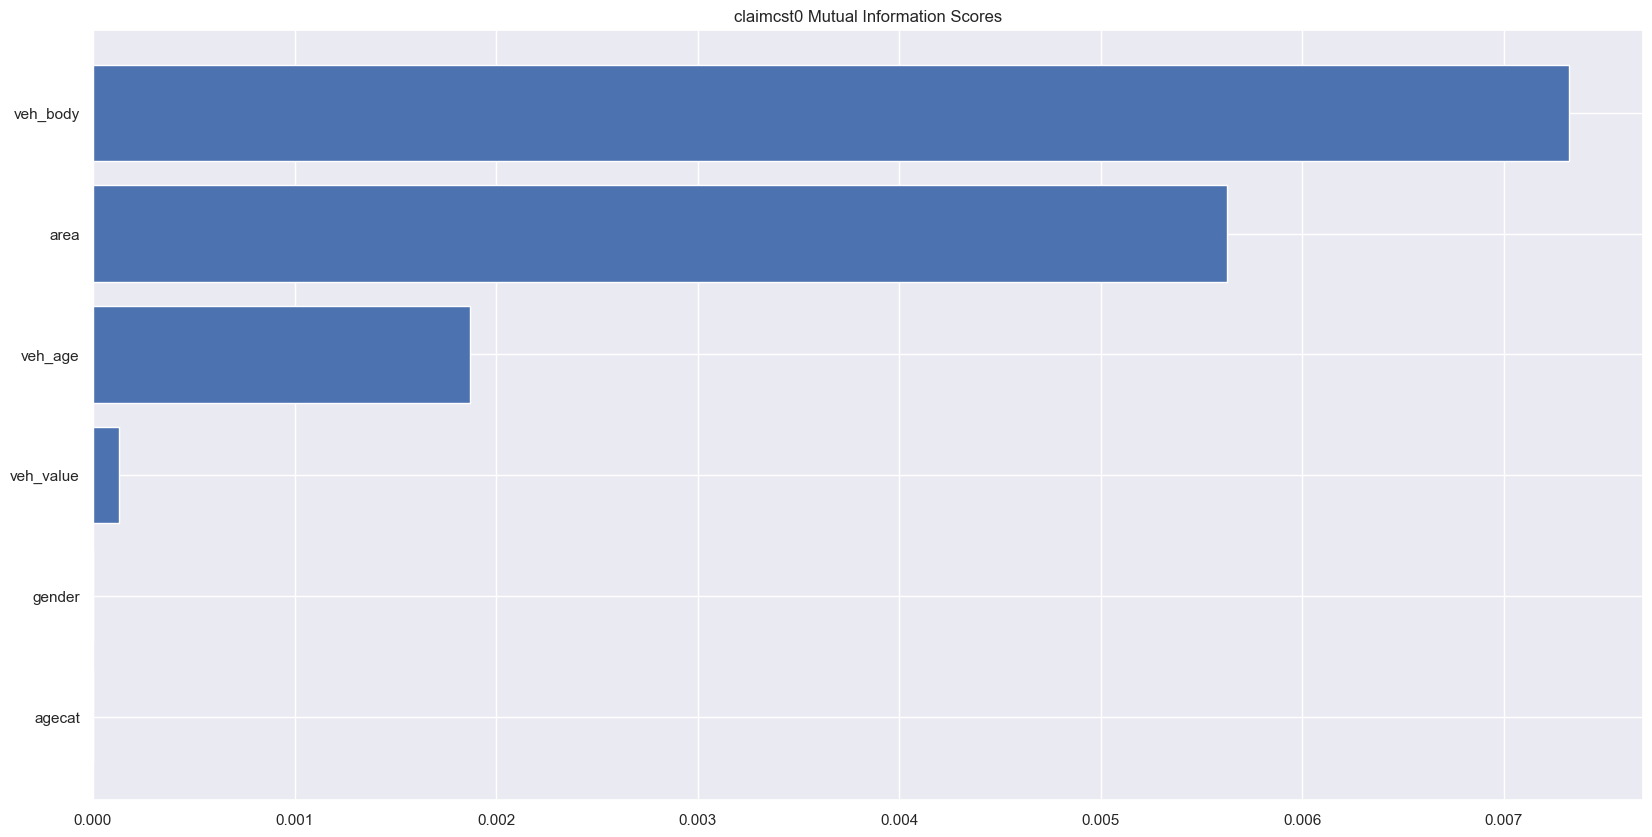

In [29]:
plot_mi_scores(mi_scores_1)
plt.title("claimcst0 Mutual Information Scores");